### Preprocessing

In [267]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [268]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [269]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS

In [270]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/College.csv"
College = pd.read_csv(url, index_col = 'Unnamed: 0')

In [271]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [272]:
College.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


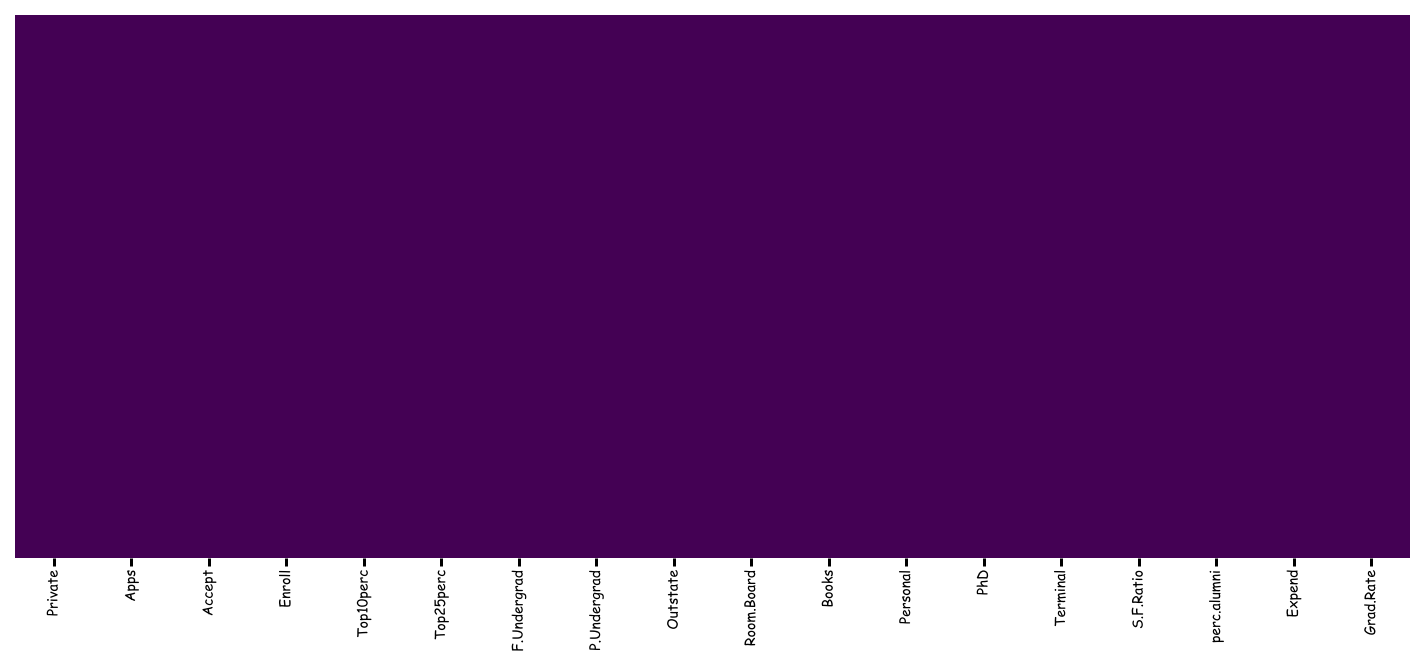

In [273]:
plt.xkcd()
plt.figure(figsize = (25, 10))
sns.heatmap(College.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

*There are no missing values as suggested by the heatmap above.*

In [274]:
College = pd.get_dummies(College, drop_first=True)

In [275]:
College.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


### 9.a. Splitting data set into a training set and a test set

In [276]:
from sklearn.model_selection import train_test_split
X = College.drop(columns=['Apps'])
y = College['Apps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [277]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 17 columns):
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
Private_Yes    777 non-null uint8
dtypes: float64(1), int64(15), uint8(1)
memory usage: 124.0+ KB


### 9.b. Fitting a linear model using least squares

In [278]:
lmfit = LinearRegression().fit(X_train, y_train)
lmpred = lmfit.predict(X_test)
lmcoefs = pd.Series(lmfit.coef_, index = X.columns)
lmintercept = pd.Series(lmfit.intercept_, index = ['Intercept'])
lmtable = pd.DataFrame(pd.concat([lmintercept, lmcoefs]))
lmtable.columns = ['Coefficients']
lmtable

,Coefficients
Intercept,-903.5693526548475
Accept,1.4213980903676726
Enroll,-0.3508598203815588
Top10perc,30.825430150658647
Top25perc,-2.764894124410797
F.Undergrad,-0.005869365556923135
P.Undergrad,-0.012513525674300727
Outstate,-0.06628850198893736
Room.Board,0.2012493316325465
Books,0.1347388982467009


In [279]:
lmerror = mean_squared_error(y_test, lmpred)
lmerror

1654196.5091456717

### 9.c. Ridge regression model

In [280]:
from sklearn.linear_model import Ridge, RidgeCV

In [281]:
n = 100
lambdas = (np.logspace(10, -2, num=100))

In [282]:
ridge = Ridge(normalize = True)
coefs = []

for k in lambdas:
    ridgelm = ridge.set_params(alpha = k).fit(X, y)
    coefs.append(ridgelm.coef_)
    
np.shape(coefs)

(100, 17)

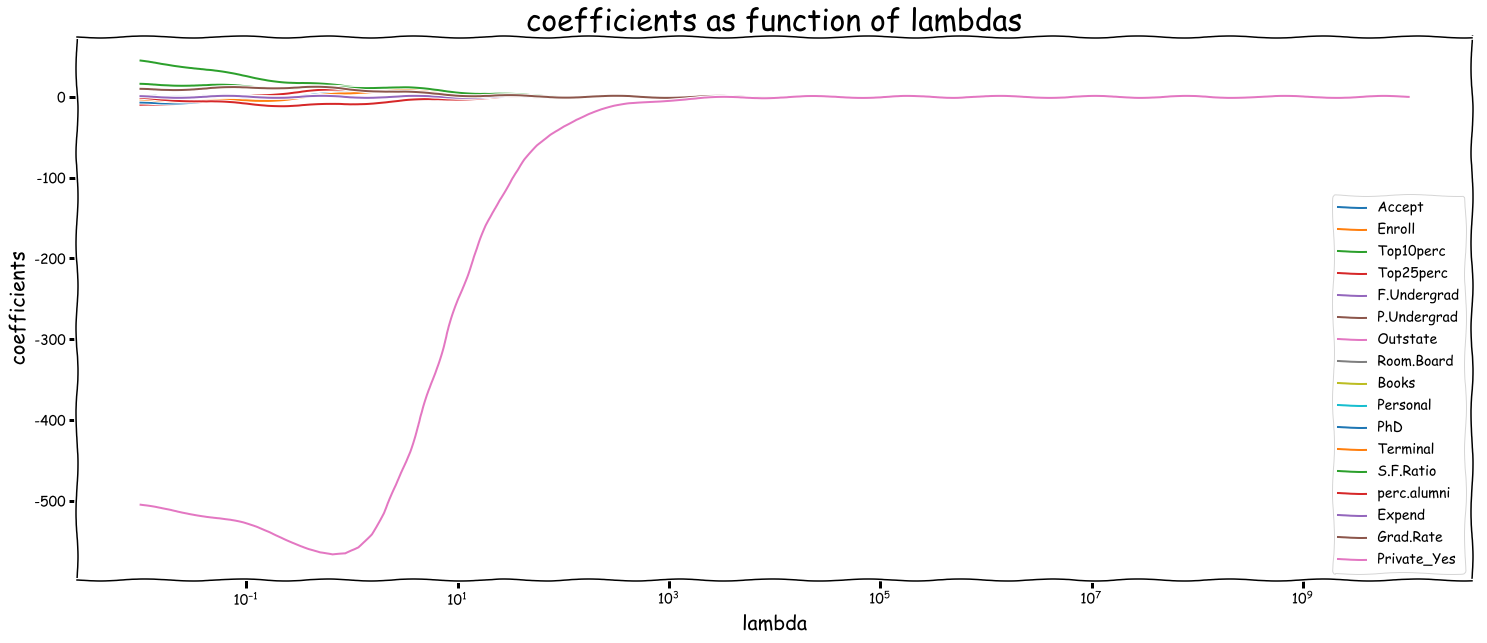

In [283]:
plt.xkcd()
plt.figure(figsize = (25, 10))
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda', fontsize = 20)
plt.ylabel('coefficients', fontsize = 20)
plt.title('coefficients as function of lambdas', fontsize = 30)
plt.legend(X)

*This graph suggests that coefficients are likely to be larger near $\lambda$=0 (at $\lambda$=0, it will exactly be like least squares regression. So, I will need a $\lambda$-value slightly higher than that to ensure sufficient reduction in variance.*

In [284]:
# lambda = 0
ridge0 = Ridge(alpha = 0, normalize = True).fit(X_train, y_train)
ridgepred0 = ridge0.predict(X_test)
ridgecoefs0 = pd.Series(ridge0.coef_, index = X.columns)
ridgeintercept0 = pd.Series(ridge0.intercept_, index = ['Intercept'])
ridgetable0 = pd.DataFrame(pd.concat([ridgeintercept0, ridgecoefs0]))
ridgetable0.columns = ['Coefficients']
ridgetable0

,Coefficients
Intercept,-903.5693526547825
Accept,1.4213980903676877
Enroll,-0.3508598203815558
Top10perc,30.825430150657887
Top25perc,-2.7648941244106937
F.Undergrad,-0.005869365556931352
P.Undergrad,-0.012513525674300446
Outstate,-0.0662885019889346
Room.Board,0.20124933163254538
Books,0.1347388982467026


In [285]:
ridgeerror0 = mean_squared_error(y_test, ridgepred0)
ridgeerror0

1654196.50914567

*As explained above, setting $\lambda$=0 returns the same value of coefficients as that of least squares regression.*

**Selecting $\lambda$ through cross-validation**

In [286]:
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error', normalize = True).fit(X_train, y_train)
ridgecv.alpha_

0.01

*Therefore, the $\lambda$ with the smallest cross-validation error is at 0.01.*

In [287]:
# lambda = 0.01
ridge1010 = Ridge(alpha = ridgecv.alpha_, normalize = True).fit(X_train, y_train)
ridgepred001 = ridge001.predict(X_test)
ridgecoefs001 = pd.Series(ridge001.coef_, index = X.columns)
ridgeintercept001 = pd.Series(ridge001.intercept_, index = ['Intercept'])
ridgetable001 = pd.DataFrame(pd.concat([ridgeintercept001, ridgecoefs001]))
ridgetable001.columns = ['Coefficients']
ridgetable001

,Coefficients
Intercept,"-1,123.9214370582877"
Accept,1.2755183427843284
Enroll,-0.025351212489103367
Top10perc,26.760860025798465
Top25perc,-0.5209789836094688
F.Undergrad,0.007232935736540551
P.Undergrad,-0.025074061519712244
Outstate,-0.05785565525807631
Room.Board,0.21618516624925221
Books,0.14523872363395798


In [288]:
ridgeerror001 = mean_squared_error(y_test, ridgepred001)
ridgeerror001

1750467.0501452675

**Therefore, the MSE through ridge regression for the best value of $\lambda$ is slightly higher than that of least squares regression.**

### 9.d. Lasso regression model

In [289]:
from sklearn.linear_model import Lasso, LassoCV
import warnings
warnings.filterwarnings('ignore')

In [290]:
n = 100
lambdas = (np.logspace(10, -2, num=100))

In [291]:
lasso = Lasso(normalize = True)
coefs = []

for k in lambdas:
    lassolm = lasso.set_params(alpha = k).fit(X, y)
    coefs.append(lassolm.coef_)
    
np.shape(coefs)

(100, 17)

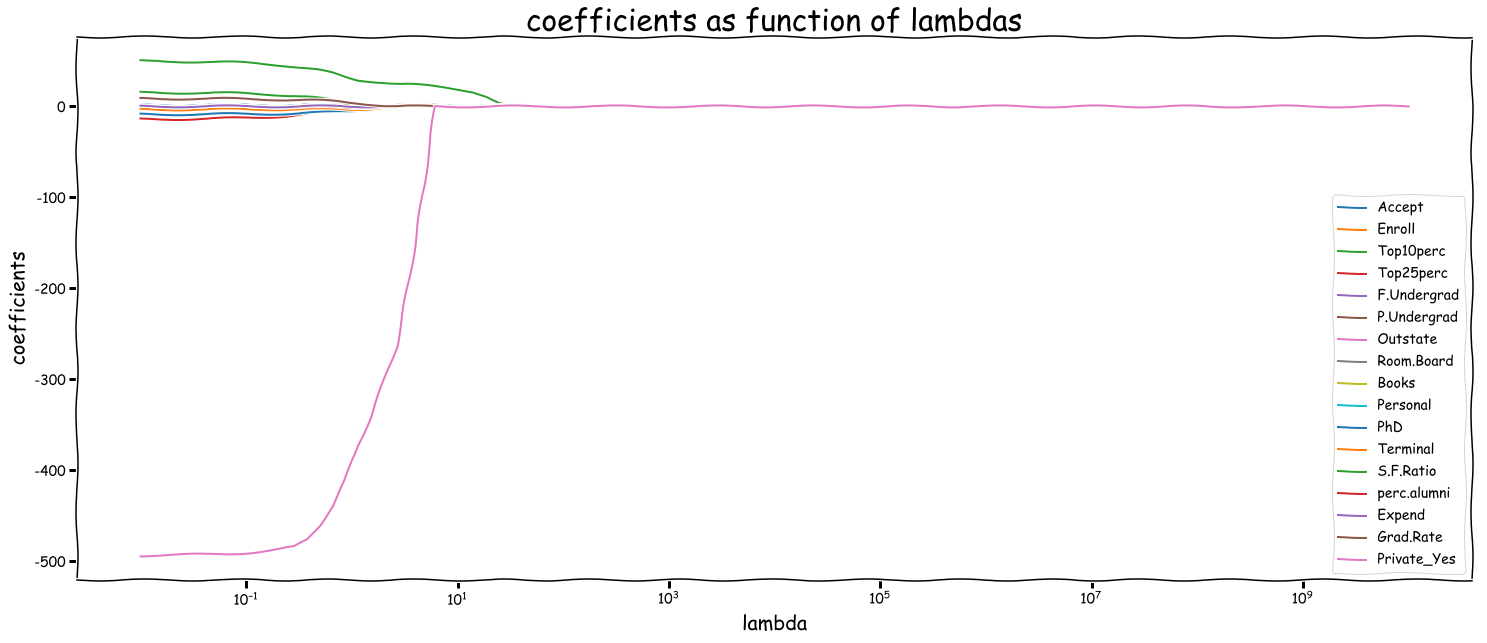

In [292]:
plt.xkcd()
plt.figure(figsize = (25, 10))
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda', fontsize = 20)
plt.ylabel('coefficients', fontsize = 20)
plt.title('coefficients as function of lambdas', fontsize = 30)
plt.legend(X)

*This graph suggests that coefficients are likely to be larger near $\lambda$=0 (at $\lambda$=0, it will exactly be like least squares regression. So, I will need a $\lambda$-value slightly higher than that to ensure sufficient reduction in variance. What is interesting however, is that different coefficients reduce to 0 with increasing $\lambda$. This suggests lasso can perform variable selection in addition to variance reduction.*

In [293]:
# lambda = 0
lasso0 = Lasso(alpha = 0, normalize = True).fit(X_train, y_train)
lassopred0 = lasso0.predict(X_test)
lassocoefs0 = pd.Series(lasso0.coef_, index = X.columns)
lassointercept0 = pd.Series(lasso0.intercept_, index = ['Intercept'])
lassotable0 = pd.DataFrame(pd.concat([lassointercept0, lassocoefs0]))
lassotable0.columns = ['Coefficients']
lassotable0

,Coefficients
Intercept,-903.5693526547866
Accept,1.421398090367681
Enroll,-0.35085982038155517
Top10perc,30.82543015065738
Top25perc,-2.764894124410353
F.Undergrad,-0.005869365556927816
P.Undergrad,-0.012513525674304332
Outstate,-0.06628850198893534
Room.Board,0.20124933163254694
Books,0.13473889824669788


In [294]:
lassoerror0 = mean_squared_error(y_test, lassopred0)
lassoerror0

1654196.5091456769

*As explained above, setting $\lambda$=0 returns the same value of coefficients as that of least squares regression.*

**Selecting $\lambda$ through cross-validation**

In [295]:
lassocv = LassoCV(alphas = lambdas, normalize = True).fit(X_train, y_train)
lassocv.alpha_

0.053366992312063016

*Therefore, the $\lambda$ with the smallest cross-validation error is at 0.053366992312063016.*

In [296]:
# lambda = 0.053366992312063016
lasso005 = Lasso(alpha = lassocv.alpha_, normalize = True).fit(X_train, y_train)
lassopred005 = lasso005.predict(X_test)
lassocoefs005 = pd.Series(lasso005.coef_, index = X.columns)
lassointercept005 = pd.Series(lasso005.intercept_, index = ['Intercept'])
lassotable005 = pd.DataFrame(pd.concat([lassointercept005, lassocoefs005]))
lassotable005.columns = ['Coefficients']
lassotable005

,Coefficients
Intercept,-902.8699549926637
Accept,1.4110058740438736
Enroll,-0.3305540570182897
Top10perc,30.005587384608337
Top25perc,-2.1685385907517722
F.Undergrad,-0.0036949389600074187
P.Undergrad,-0.013078378486742516
Outstate,-0.0647156633924421
Room.Board,0.2006498865207145
Books,0.13722628697841407


In [297]:
lassoerror005 = mean_squared_error(y_test, lassopred005)
lassoerror005

1659925.340846992

**Therefore, the MSE through lasso regression for the best value of $\lambda$ is slightly higher than that of least squares regression.**

### 9.e. Principal components regression

In [298]:
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold as KF
from sklearn.decomposition import PCA

In [299]:
pca = PCA()
X_scaled = pca.fit_transform(scale(X))
pd.DataFrame(pca.components_.T).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.01314987132951749,0.41903333197327414,-0.027107051449040565,0.3623241053986074,-0.11208647470759313,0.0022943602748736543,-0.024321591900829293,-0.07800898754227437,-0.20599888861002863,0.11151860017110572,-0.1393501634894806,0.012237381611595145,-0.08464487115792485,-0.044591104694707034,0.6682088929005001,0.3409164875614054,0.1632744786460077
1,-0.028704584965656227,0.44295163881297833,-0.02831661461279704,0.2504153788330966,-0.17548938884266926,-0.05347874565067054,-0.038284093408305714,0.022375564663969692,-0.1587140221516464,0.10702775566263811,-0.09976449303969623,-0.011527651488108961,0.08421907203127096,-0.005394791264355853,-0.28998483237833145,-0.09178842087845772,-0.7466379076280849
2,0.34473625164041793,0.1304124357398508,0.0056020621262618435,-0.2210187476446764,-0.3319672139528076,-0.05998852385496288,-0.14261885939897234,-0.15538098913431234,0.3350039651490999,0.05622983757226574,0.02219844706493228,-0.015129508216150753,0.04425461220703421,-0.10073782779362193,-0.29895160204744675,0.6610227321717522,0.04943461024043379
3,0.3186747707520981,0.16142254252329014,-0.05765506239608408,-0.2524824034364028,-0.3443602049336961,0.02063556418783082,-0.08352228180818956,-0.13692165685810545,0.40463438835087834,0.04070938098290167,-0.13780134563505195,-0.23205052797436607,-0.10087114186813358,0.1373650048262209,0.3248587492190504,-0.5340817717029815,-0.0504065086034342
4,-0.05444324276567855,0.44761743137493565,-0.01707627555584372,0.20160581197133662,-0.13620363983258815,-0.05469604234105233,-0.03230905242025684,0.04066038909577713,-0.08605623547037664,0.07995166006636031,-0.07274562017435733,-0.04068873855310262,0.0979258226910883,0.04265235406843265,-0.46056518579490896,-0.2809535348892339,0.6389745876615059


In [300]:
# selecting M, the number of components that give the lowest cross-validation error
n = len(X)
kf10 = KF(n_splits=10, shuffle=True, random_state=42)

lm = LinearRegression()
MSEdf= pd.DataFrame()

# calculating MSE with only the intercept through cross-validation
mse = -1*model_selection.cross_val_score(lm, np.ones((n,1)), y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()    
MSEdf = MSEdf.append([round(mse, 9)])

# calculating MSE for the 17 components through cross-validation
for i in np.arange(1, 18):
    mse = -1*model_selection.cross_val_score(lm, X_scaled[:,:i], y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()
    MSEdf = MSEdf.append([round(mse, 9)])
    
MSEdf.reset_index(drop=True, inplace=True)
MSEdf.columns = ['MSE']
MSEdf

,MSE
0,"15,010,654.411037762"
1,"14,703,163.995916674"
2,"4,168,014.791848564"
3,"4,181,084.918514465"
4,"2,853,095.72631284"
5,"2,542,134.721528304"
6,"2,549,380.55976864"
7,"2,516,723.593201373"
8,"2,367,537.694021392"
9,"2,280,221.426632368"


Text(0,0.5,'MSE')

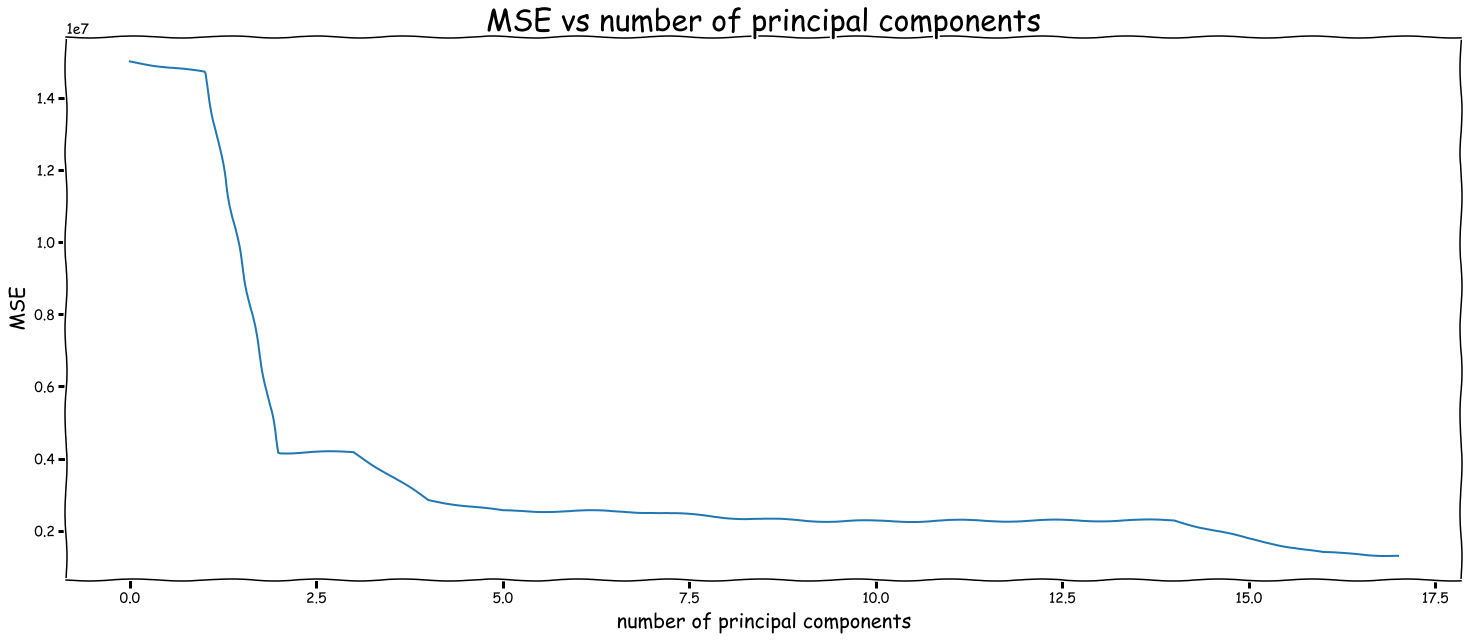

In [301]:
# plotting MSE for each component
plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdf)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0,0.5,'explained variance ratio')

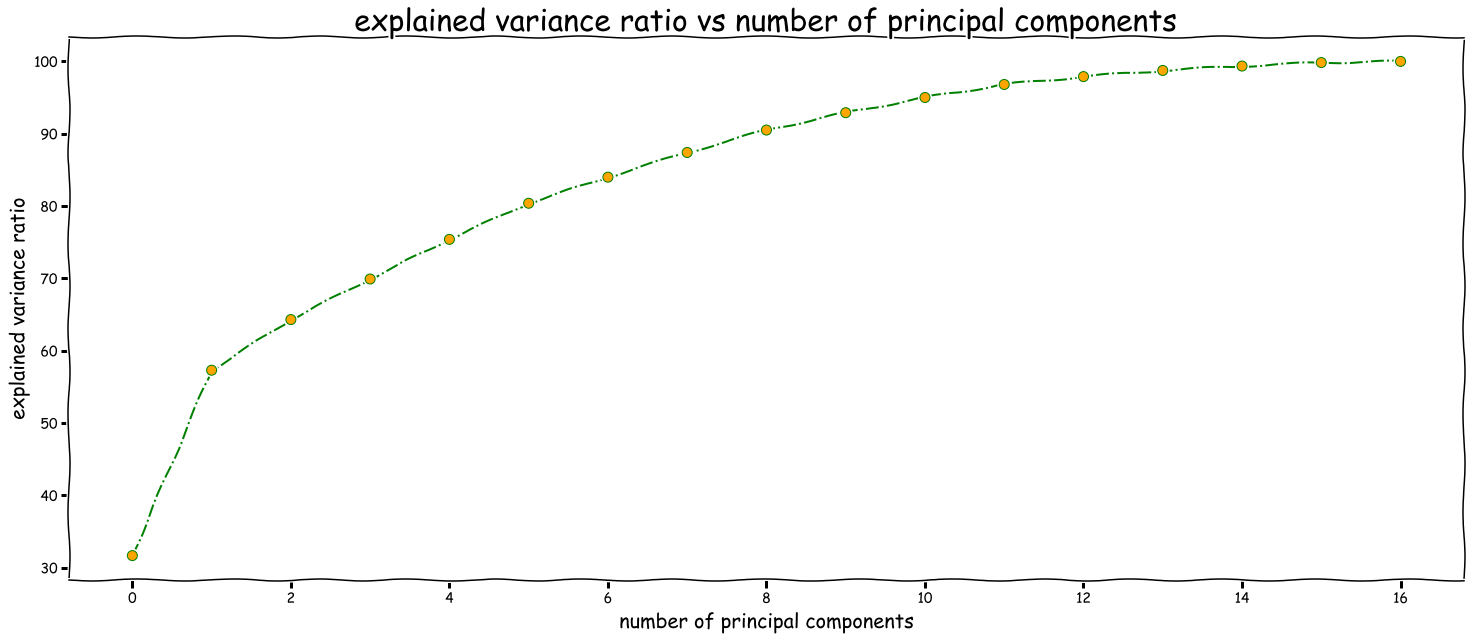

In [302]:
# plotting explained variance ratio
exp_var_ratio = pd.DataFrame(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(exp_var_ratio, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

*This suggests that I will get the lowest MSE at M=17, which is the same as performing a regular least squares regression! So, I will now perform PCR on the training set and validate the model using the test set.*

In [303]:
# performing PCR on train and test data sets
pca_train = PCA()
X_scaled_train = pca_train.fit_transform(scale(X_train))
n = len(X_scaled_train)

lmtrain = LinearRegression()

kf10train = KF(n_splits=10, shuffle=True, random_state=42)
MSEdftrain= pd.DataFrame()

# calculating MSE with only the intercept through cross-validation
msetrain = -1*model_selection.cross_val_score(lmtrain, np.ones((n,1)), y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()    
MSEdftrain = MSEdftrain.append([msetrain])

# calculating MSE for the 17 components through cross-validation
for i in np.arange(1, 18):
    msetrain = -1*model_selection.cross_val_score(lmtrain, X_scaled_train[:,:i], y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()
    MSEdftrain = MSEdftrain.append([msetrain])
    
MSEdftrain.reset_index(drop=True, inplace=True)
MSEdftrain.columns = ['MSE']
MSEdftrain

,MSE
0,"11,252,744.574789826"
1,"11,294,261.750125809"
2,"2,691,747.115480534"
3,"2,690,404.447884838"
4,"1,614,735.0550507945"
5,"1,489,967.3355923549"
6,"1,449,176.8247473342"
7,"1,452,726.7867313675"
8,"1,458,369.6486197587"
9,"1,239,232.6741065749"


Text(0,0.5,'MSE')

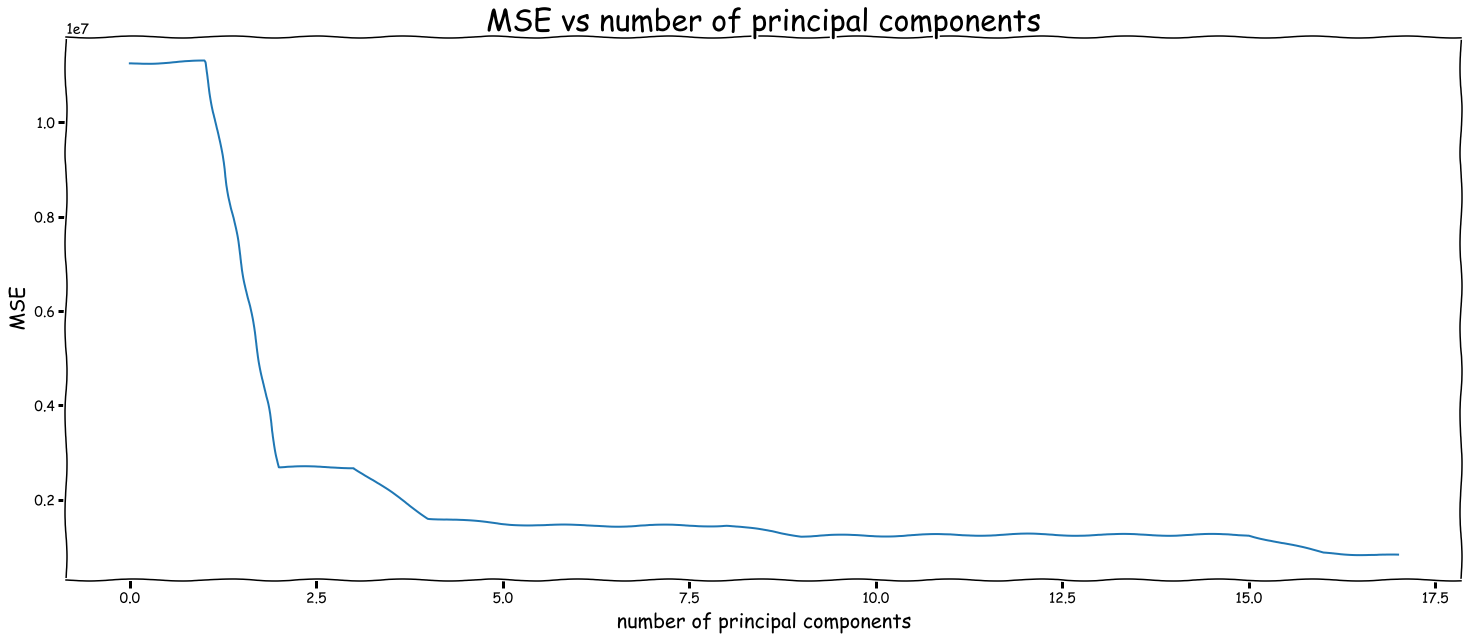

In [304]:
# plotting MSE for each component
plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdftrain)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0,0.5,'explained variance ratio')

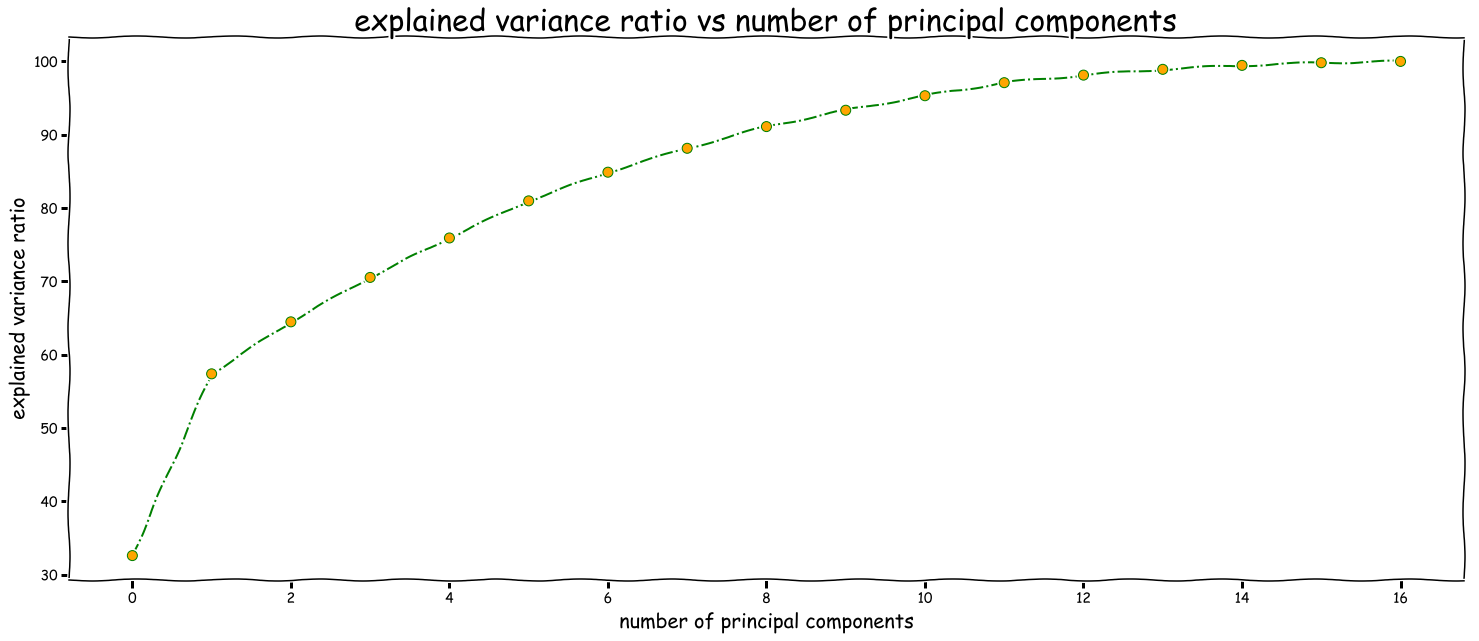

In [305]:
# plotting explained variance ratio
exp_var_ratio_scaled = pd.DataFrame(np.cumsum(np.round(pca_train.explained_variance_ratio_, decimals=4)*100))
plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(exp_var_ratio_scaled, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

*While the MSEs themselves are somewhat reduced due to scaling, the results still suggest that I will get the best test MSE at M=17.*

In [314]:
X_scaled_test = pca.fit_transform(scale(X_test))
pcrfit17 = LinearRegression().fit(X_scaled_train, y_train)
pcrpred17 = pcrfit17.predict(X_scaled_test)

pcrerror17 = mean_squared_error(y_test, lmpred17)
pcrerror17

8503236.248276565

**So far, PCR has produced the largest MSE amongst all models used.**

### 9.f. Partial least squares

In [307]:
from sklearn.cross_decomposition import PLSRegression as PLS

In [308]:
# performing PLS on train and test data sets
n = len(X_train)
kf10train = KF(n_splits=10, shuffle=True, random_state=1)

MSEdftrain= pd.DataFrame()

# calculating MSE for the 17 components through cross-validation
for k in np.arange(1, 18):
    plstrain = PLS(n_components=k)
    msetrain = -1*model_selection.cross_val_score(plstrain, scale(X_train), y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()
    MSEdftrain = MSEdftrain.append([msetrain])
    
MSEdftrain.reset_index(drop=True, inplace=True)
MSEdftrain.columns = ['MSE']
MSEdftrain

,MSE
0,"2,081,015.1986122367"
1,"1,345,342.2243980314"
2,"1,209,795.7426973968"
3,"1,142,730.2576548648"
4,"986,051.9393822663"
5,"889,878.1381599471"
6,"868,362.5746485045"
7,"845,604.9840667791"
8,"842,144.0967488354"
9,"840,917.5947194148"


Text(0,0.5,'MSE')

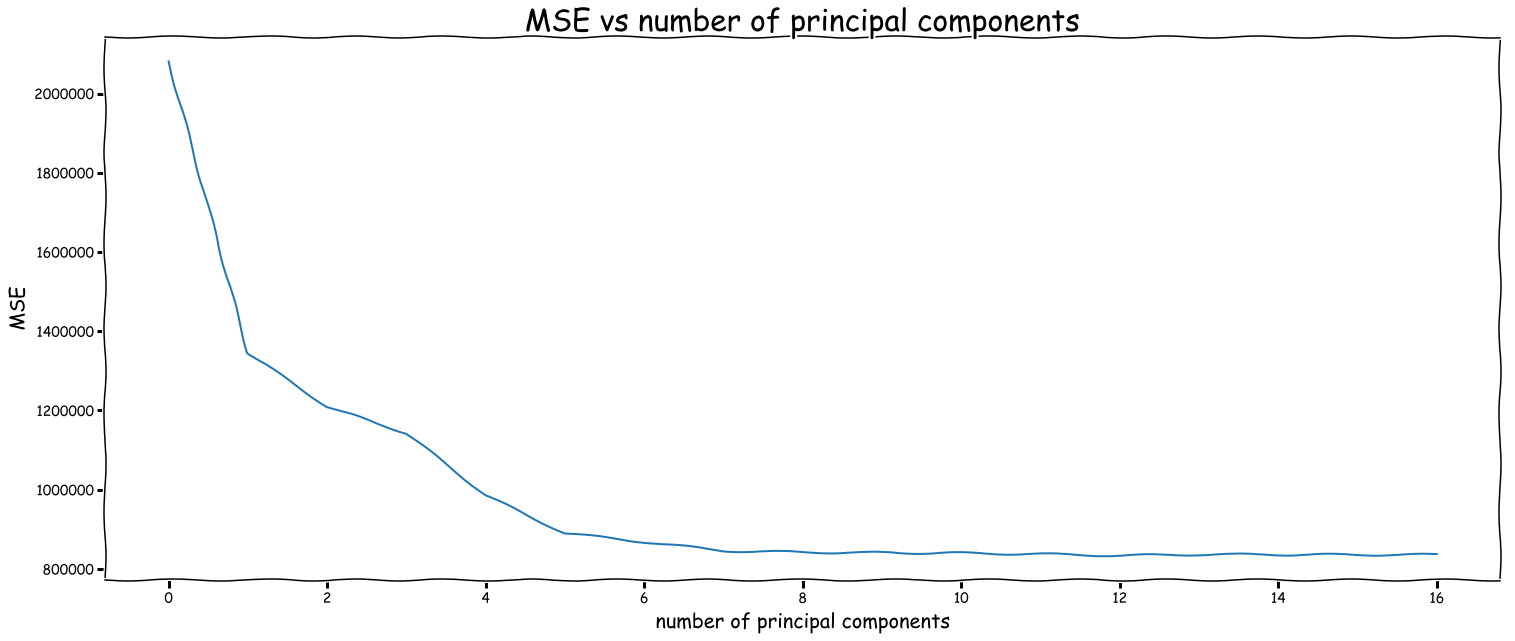

In [309]:
# plotting MSE for each component
plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdftrain)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0,0.5,'explained variance ratio')

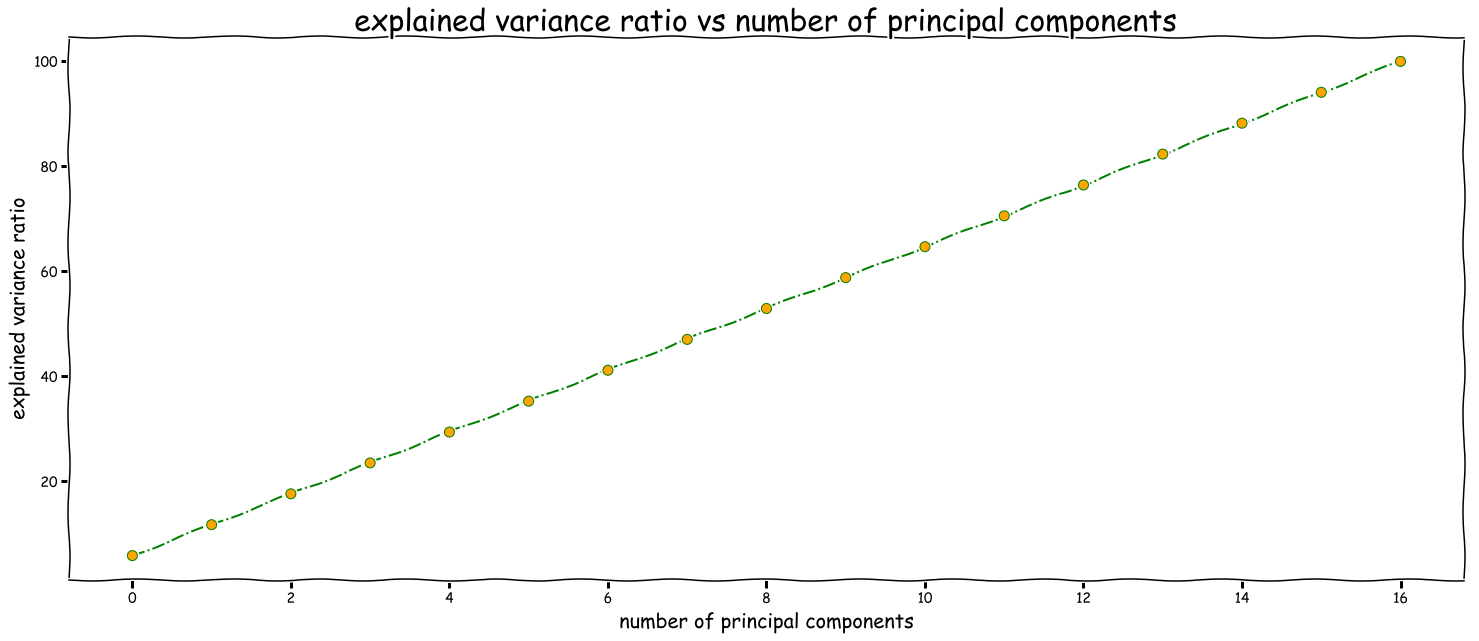

In [310]:
explained_variance_ratio_test = np.var(scale(X_train), axis=0) / np.sum(np.var(scale(X_train), axis=0)) # PLS does not have any method to automatically calculate explained variance ratio
EVR17 = pd.DataFrame(np.cumsum(np.round(explained_variance_ratio_test, decimals=4)*100), columns=['Explained Variance Ratio'])
plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(EVR17, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

*The results suggest that I will get the best test MSE at M=12.*

In [311]:
plsfit12 = PLS(n_components=12).fit(scale(X_train), y_train)
plspred12 = plsfit12.predict(scale(X_test))
plserror12 = mean_squared_error(y_test, plspred12)
plserror12

2187992.3028068137

**Partial least squares produces significantly lower test MSE than principal components regression.**

### 9.g. Comparing different models

In [312]:
pd.options.display.float_format = '{:,}'.format
error_list = pd.DataFrame([round(lmerror, 2), round(ridgeerror001, 2), round(lassoerror005, 2), round(pcrerror17, 2), round(plserror12, 2)])
error_cols = pd.DataFrame(['linear regression', 'ridge regression', 'lasso regression', 'principal components regression', 'partial least squares'])
error_df = pd.concat([error_cols, error_list], axis=1)
error_df.columns = ['method', 'MSE']
error_df

,method,MSE
0,linear regression,"1,654,196.51"
1,ridge regression,"1,750,467.05"
2,lasso regression,"1,659,925.34"
3,principal components regression,"8,503,236.25"
4,partial least squares,"2,187,992.3"


Text(0.5,1,'MSE vs method')

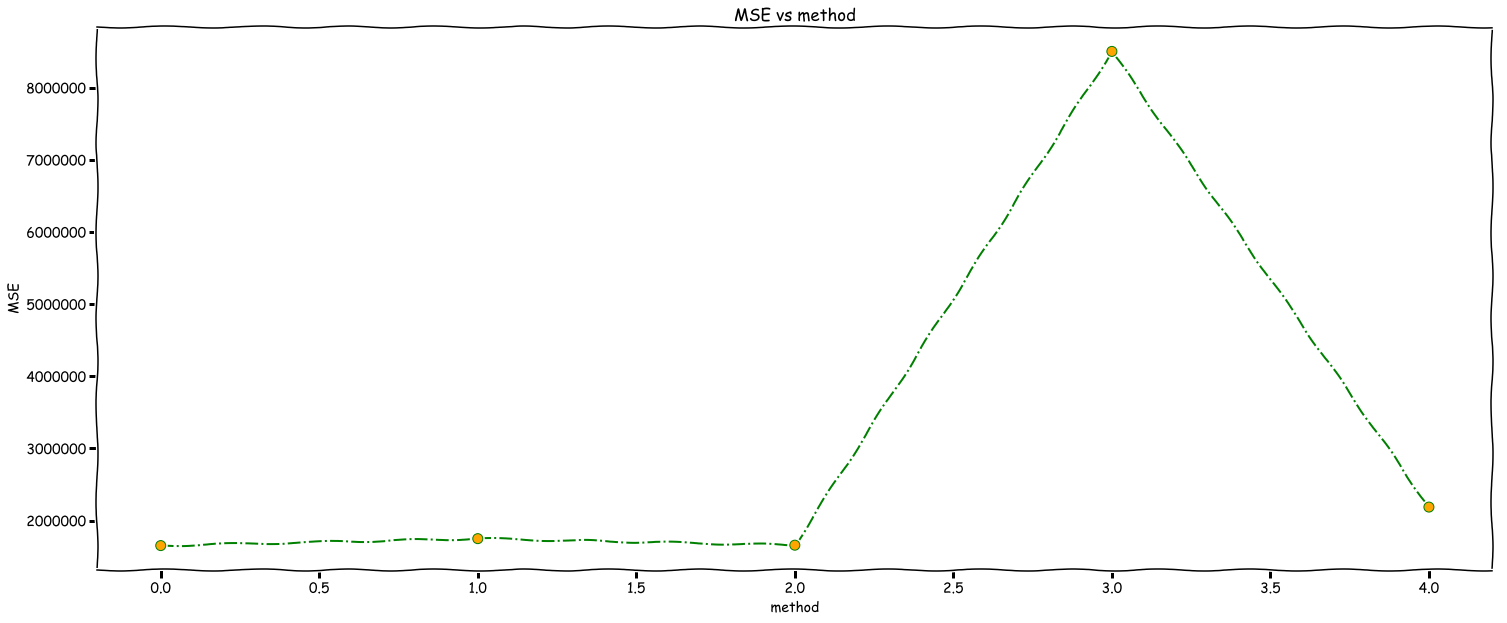

In [313]:
plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(error_df['MSE'], color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange') # ideally I should be using a histogram, but one of the values is excessively higher than the rest which makes it difficult to view other bars
plt.xlabel('method')
plt.ylabel('MSE')
plt.title('MSE vs method')